In [16]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(scales)
library(lubridate)
library(cowplot)
library(binom)
library(stats)

In [10]:
# Set up the data
y <- 7
n <- 20

# Conduct the analysis assuming a uniform prior
binom.test(x = y, n = n, p = 0.5, alternative = "two.sided", conf.level = 0.95)


	Exact binomial test

data:  y and n
number of successes = 7, number of trials = 20, p-value = 0.2632
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.1539092 0.5921885
sample estimates:
probability of success 
                  0.35 


In [18]:
# Conduct the analysis assuming a Jeffrey's prior
binom.bayes(x = y, n = n, type = "central", conf.level = 0.95, prior.shape1=0.5, prior.shape2=0.5)

method,x,n,shape1,shape2,mean,lower,upper,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bayes,7,20,7.5,13.5,0.3571429,0.1722762,0.5677661,0.05


In [99]:
# Prior 1: Uniform distribution
alpha1 <- 1
beta1 <- 1
prior1 <- function(p) dbeta(p, alpha1, beta1)

# Prior 2: Jeffrey's prior
alpha2 <- 0.5
beta2 <- 0.5
prior2 <- function(p) dbeta(p, alpha2, beta2)

# Prior 3: Step function
prior_step <- function(p) {
  ifelse (p <= 0.2, p, ifelse(p>2 & p <= 0.3, 0.2, ifelse(p>0.3 & p <= 0.5, (0.5-p), 0)))  
}


# Data
y <- 7
n <- 20

# Posterior 1
alpha1_post <- alpha1 + y
beta1_post <- beta1 + n - y
posterior1 <- function(p) dbeta(p, alpha1_post, beta1_post)

# Posterior 2
alpha2_post <- alpha2 + y
beta2_post <- beta2 + n - y
posterior2 <- function(p) dbeta(p, alpha2_post, beta2_post)

#Posterior 3
alpha3_post <- sum(prior_step(runif(1e4)) * dbinom(y, n, runif(1e4)))
beta3_post <- sum(prior_step(runif(1e4)) * dbinom(n - y, n, runif(1e4)))
posterior3 <- function(p) dbeta(p, alpha3_post, beta3_post)



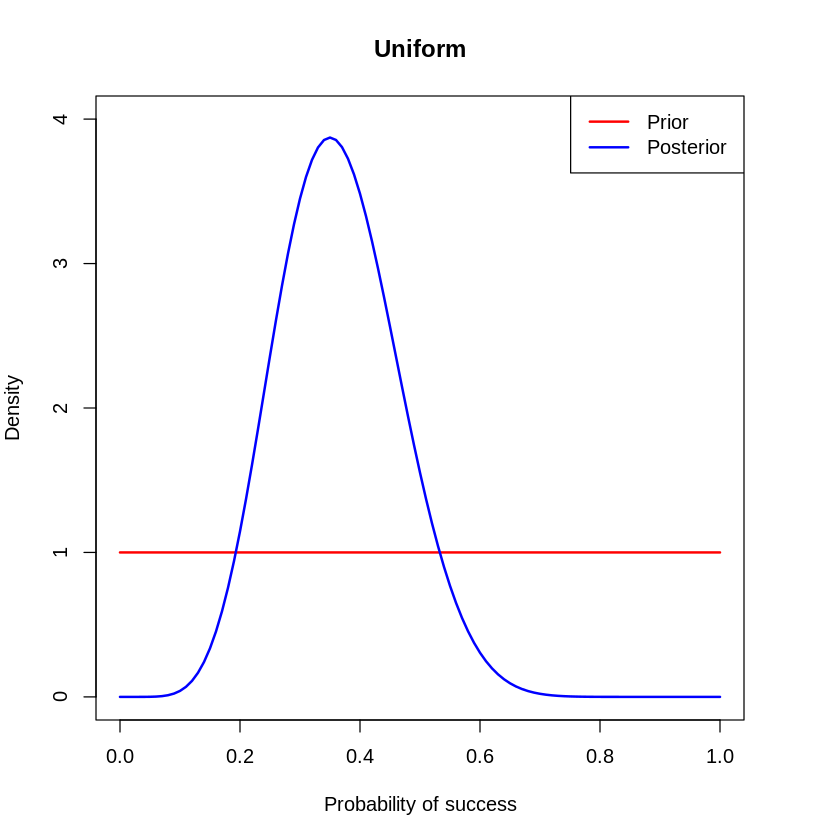

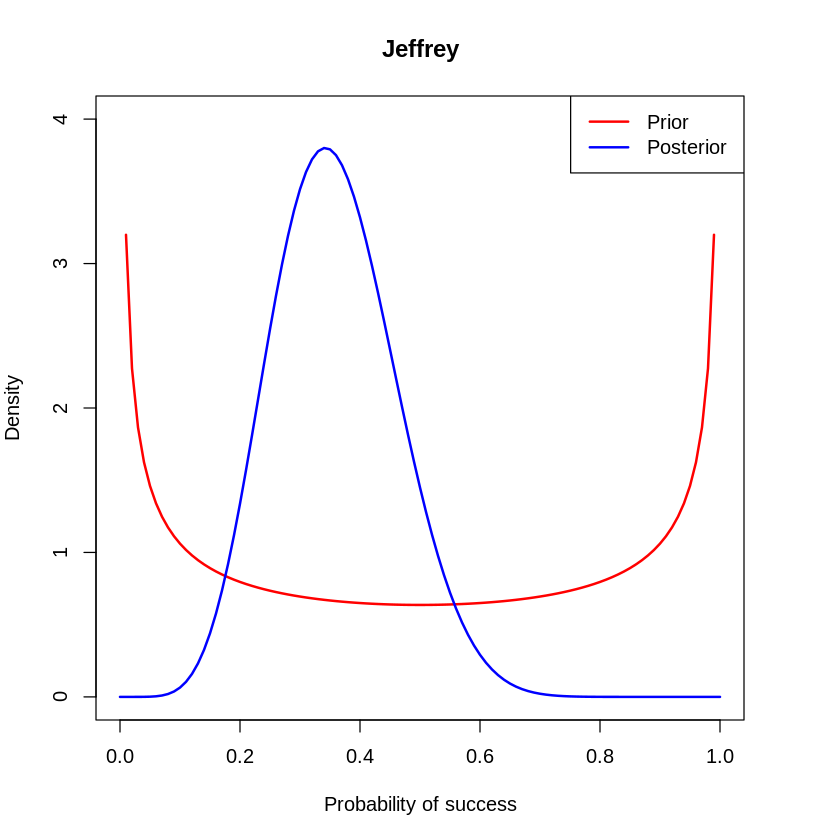

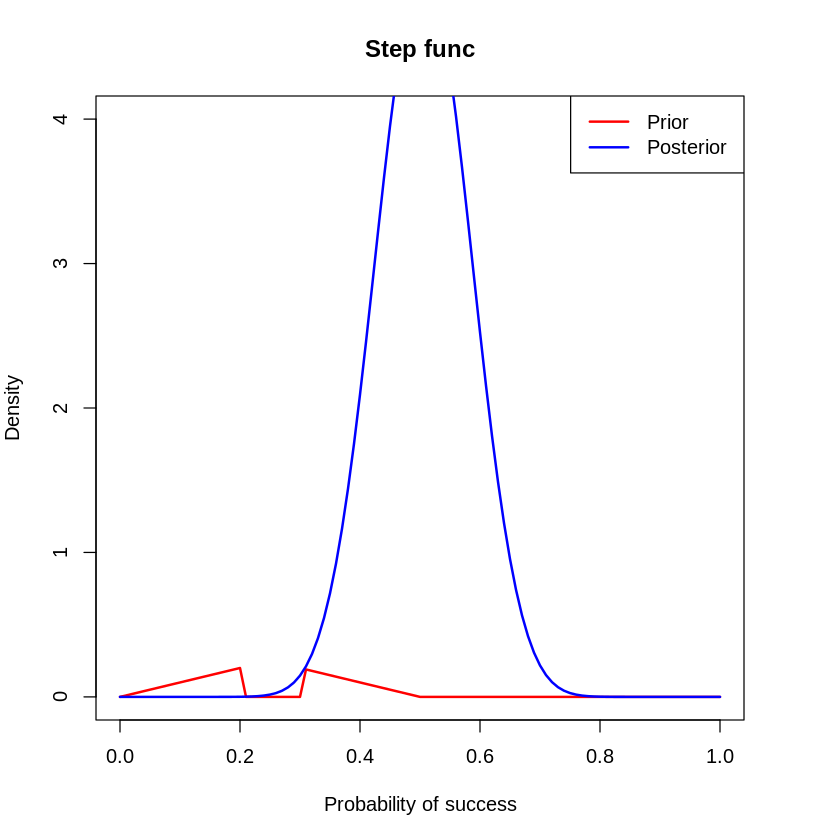

In [100]:
# Plot posterior distributions
par(mar = c(5, 4, 4, 4))
curve(prior1, 0, 1, col = "red", lwd = 2, ylab = "Density", xlab = "Probability of success", main = 'Uniform', ylim=c(0,4))
curve(posterior1,add = TRUE, col = "blue", lwd = 2)
legend("topright", legend = c("Prior", "Posterior"), col = c("red", "blue"), lwd = 2)


curve(prior2, 0, 1, col = "red", lwd = 2, ylab = "Density", xlab = "Probability of success", main ='Jeffrey', ylim=c(0,4))
curve(posterior2, add = TRUE, col = "blue", lwd = 2)
legend("topright", legend = c("Prior", "Posterior"), col = c("red", "blue"), lwd = 2)


curve(prior_step, 0, 1, col = "red", lwd = 2, ylab = "Density", xlab = "Probability of success", main = 'Step func', ylim=c(0,4))
curve(posterior3, add = TRUE, col = "blue", lwd = 2)
legend("topright", legend = c("Prior", "Posterior"), col = c("red", "blue"), lwd = 2)

In [104]:
# Summary of results
cat("Uniform prior - Posterior moments:\n")
mean_post1 <- alpha1_post / (alpha1_post + beta1_post)
var_post1 <- alpha1_post * beta1_post / ((alpha1_post + beta1_post)^2 * (alpha1_post + beta1_post + 1))
cat(paste0("Mean: ", round(mean_post1, 3), "\n"))
cat(paste0("Variance: ", round(var_post1, 6), "\n\n"))

cat("Jeffrey's prior - Posterior moments:\n")
mean_post2 <- alpha2_post / (alpha2_post + beta2_post)
var_post2 <- alpha2_post * beta2_post / ((alpha2_post + beta2_post)^2 * (alpha2_post + beta2_post + 1))
cat(paste0("Mean: ", round(mean_post2, 3), "\n"))
cat(paste0("Variance: ", round(var_post2, 6), "\n\n"))

cat("Step function prior - Posterior moments:\n")
mean_post <- alpha3_post / (alpha3_post + beta3_post)
var_post <- alpha3_post * beta3_post / ((alpha3_post + beta3_post)^2 * (alpha3_post + beta3_post + 1))
cat(paste0("Mean: ", round(mean_post, 3), "\n"))
cat(paste0("Variance: ", round(var_post, 6), "\n"))


Uniform prior - Posterior moments:
Mean: 0.364
Variance: 0.010061

Jeffrey's prior - Posterior moments:
Mean: 0.357
Variance: 0.010436

Step function prior - Posterior moments:
Mean: 0.506
Variance: 0.006064


In [106]:
# Credibility interval
alpha <- 0.05
ci1 <- qbeta(c(alpha / 2, 1 - alpha / 2), alpha1_post, beta1_post)
ci2 <- qbeta(c(alpha / 2, 1 - alpha / 2), alpha2_post, beta2_post)
ci3 <- qbeta(c(alpha / 2, 1 - alpha / 2), alpha3_post, beta3_post)

cat("Uniform prior - Credibility interval:\n")
cat(paste0("Lower limit: ", round(ci1[1], 3), "\n"))
cat(paste0("Upper limit: ", round(ci1[2], 3), "\n\n"))

cat("Jeffrey's prior - Credibility interval:\n")
cat(paste0("Lower limit: ", round(ci2[1], 3), "\n"))
cat(paste0("Upper limit: ", round(ci2[2], 3),'\n\n'))

cat("Step function prior - Credibility interval:\n")
cat(paste0("Lower limit: ", round(ci3[1], 3), "\n"))
cat(paste0("Upper limit: ", round(ci3[2], 3)))


Uniform prior - Credibility interval:
Lower limit: 0.181
Upper limit: 0.57

Jeffrey's prior - Credibility interval:
Lower limit: 0.172
Upper limit: 0.568

Step function prior - Credibility interval:
Lower limit: 0.354
Upper limit: 0.657

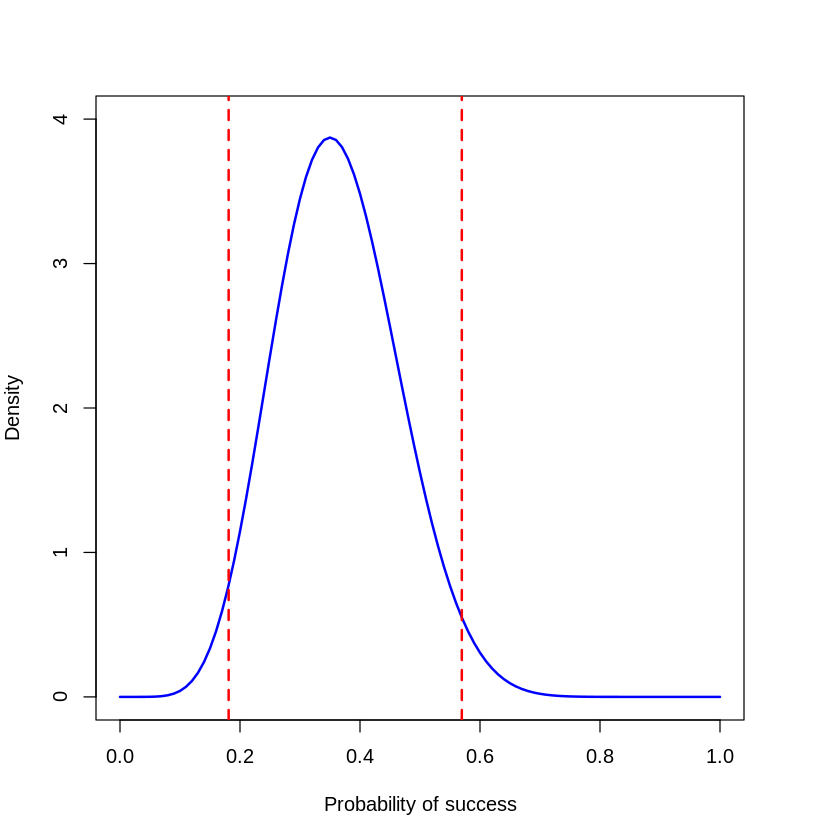

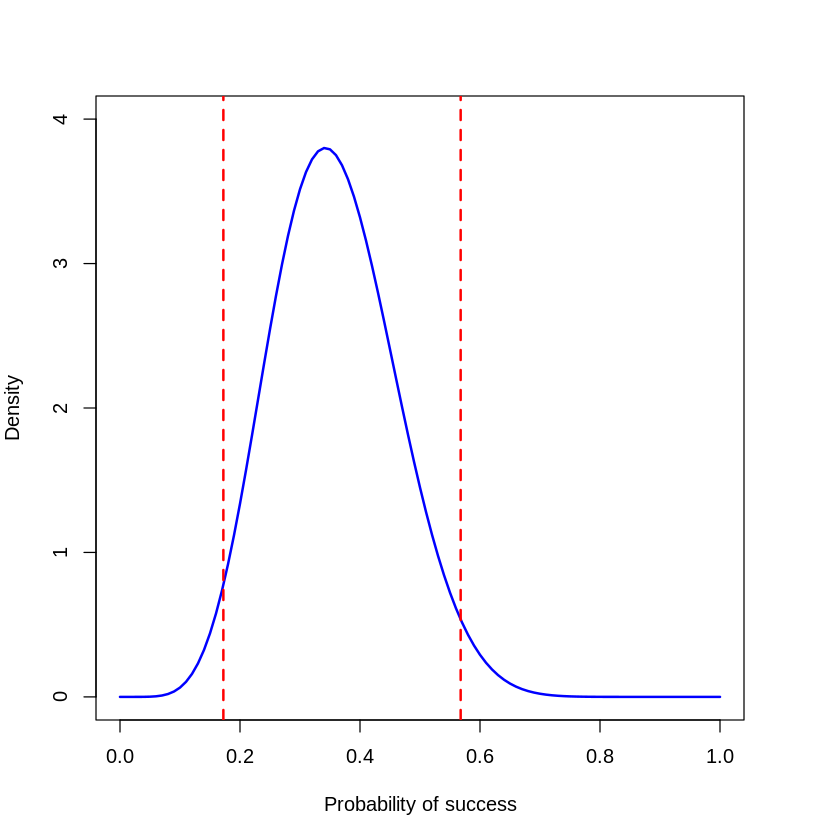

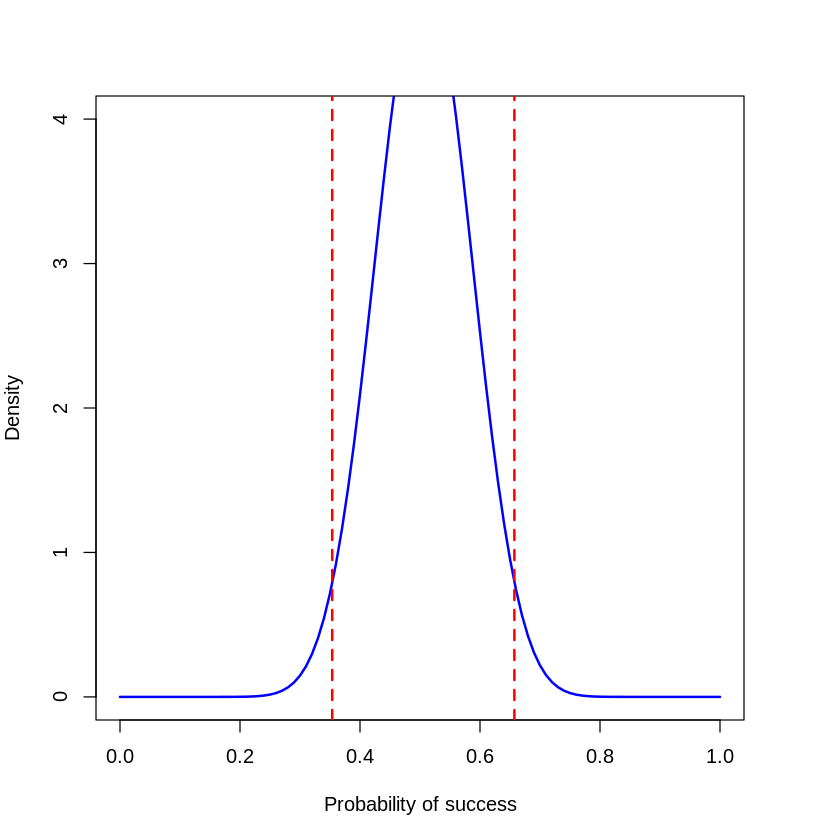

In [108]:
# Plot posterior distributions with credibility intervals

par(mar = c(5, 4, 4, 4))
curve(posterior1, 0, 1, col = "blue", lwd = 2, ylab = "Density", xlab = "Probability of success", ylim=c(0,4))
abline(v = ci1, lty = 2, col = "red", lwd = 2)
text(ci1[1], 8, round(ci1[1], 2), pos = 4)
text(ci1[2], 8, round(ci1[2], 2), pos = 2)

curve(posterior2, 0, 1, col = "blue", lwd = 2, ylab = "Density", xlab = "Probability of success", ylim=c(0,4))
abline(v = ci2, lty = 2, col = "red", lwd = 2)
text(ci2[1], 8, round(ci2[1], 2), pos = 4)
text(ci2[2], 8, round(ci2[2], 2), pos = 2)

curve(posterior3, 0, 1, col = "blue", lwd = 2, ylab = "Density", xlab = "Probability of success", ylim=c(0,4))
abline(v = ci3, lty = 2, col = "red", lwd = 2)
text(ci3[1], 8, round(ci3[1], 2), pos = 4)
text(ci3[2], 8, round(ci3[2], 2), pos = 2)